In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
#df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
#df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])
df = pd.read_table('ParameterSetsW_Errors.csv',sep=',')

In [3]:
df.sample(5)

a1        a2        a3            a4            a5        a6   
149  0.589034  0.532366  0.743478  3.800000e+20  7.690000e+21  0.004944  \
321  0.451269  0.569774  4.149721  1.770525e+00  2.433541e-01  0.045762   
319  0.448057  0.608508  0.916452  4.380047e-01  1.163750e+00  0.013668   
305  0.400083  0.605584  1.286411  5.586112e-01  8.257012e-01  0.015279   
177  0.407467  0.635746  0.765935  5.078212e-01  3.234424e+04  0.007032   

           a7        n1        n2  t_half_Lead  v_max_Lead  t_half_Lagg   
149  0.003422  1.093002  1.029692    14.044885    1.287527    13.905501  \
321  0.052418  1.165695  1.505934    18.943893    1.362123    14.908235   
319  0.012834  1.127695  1.035023    16.659223    1.224436    11.547666   
305  0.015523  1.175823  1.155068    20.661084    1.387258    12.483265   
177  0.005114  1.166926  0.981860    20.036416    1.362346    11.017511   

     v_max_Lagg  LeadRecruitError  LaggRecruitError  CytoError   
149    1.204411          0.102488          0.189353   0.241297  \
321    1.376902          0.213267          0.153417   0.173299   
319    1.126654          0.230427          0.268854   0.319147   
305    1.200858          0.171550          0.068675   0.160166   
177    1.116237          0.163712          0.170909   0.217529   

     LeadRecoveryError  LaggRecoveryError  mmh  
149           1.527949           1.618819    2  
321           1.228019           1.051431    3  
319           1.659507           1.558079    3  
305           1.484668           1.048733    3  
177           1.498661           1.516861    2

In [4]:
df['n1-n2'] = df['n1'] - df['n2']

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   a1                 360 non-null    float64
 1   a2                 360 non-null    float64
 2   a3                 360 non-null    float64
 3   a4                 360 non-null    float64
 4   a5                 360 non-null    float64
 5   a6                 360 non-null    float64
 6   a7                 360 non-null    float64
 7   n1                 360 non-null    float64
 8   n2                 360 non-null    float64
 9   t_half_Lead        360 non-null    float64
 10  v_max_Lead         360 non-null    float64
 11  t_half_Lagg        360 non-null    float64
 12  v_max_Lagg         360 non-null    float64
 13  LeadRecruitError   360 non-null    float64
 14  LaggRecruitError   360 non-null    float64
 15  CytoError          360 non-null    float64
 16  LeadRecoveryError  360 non

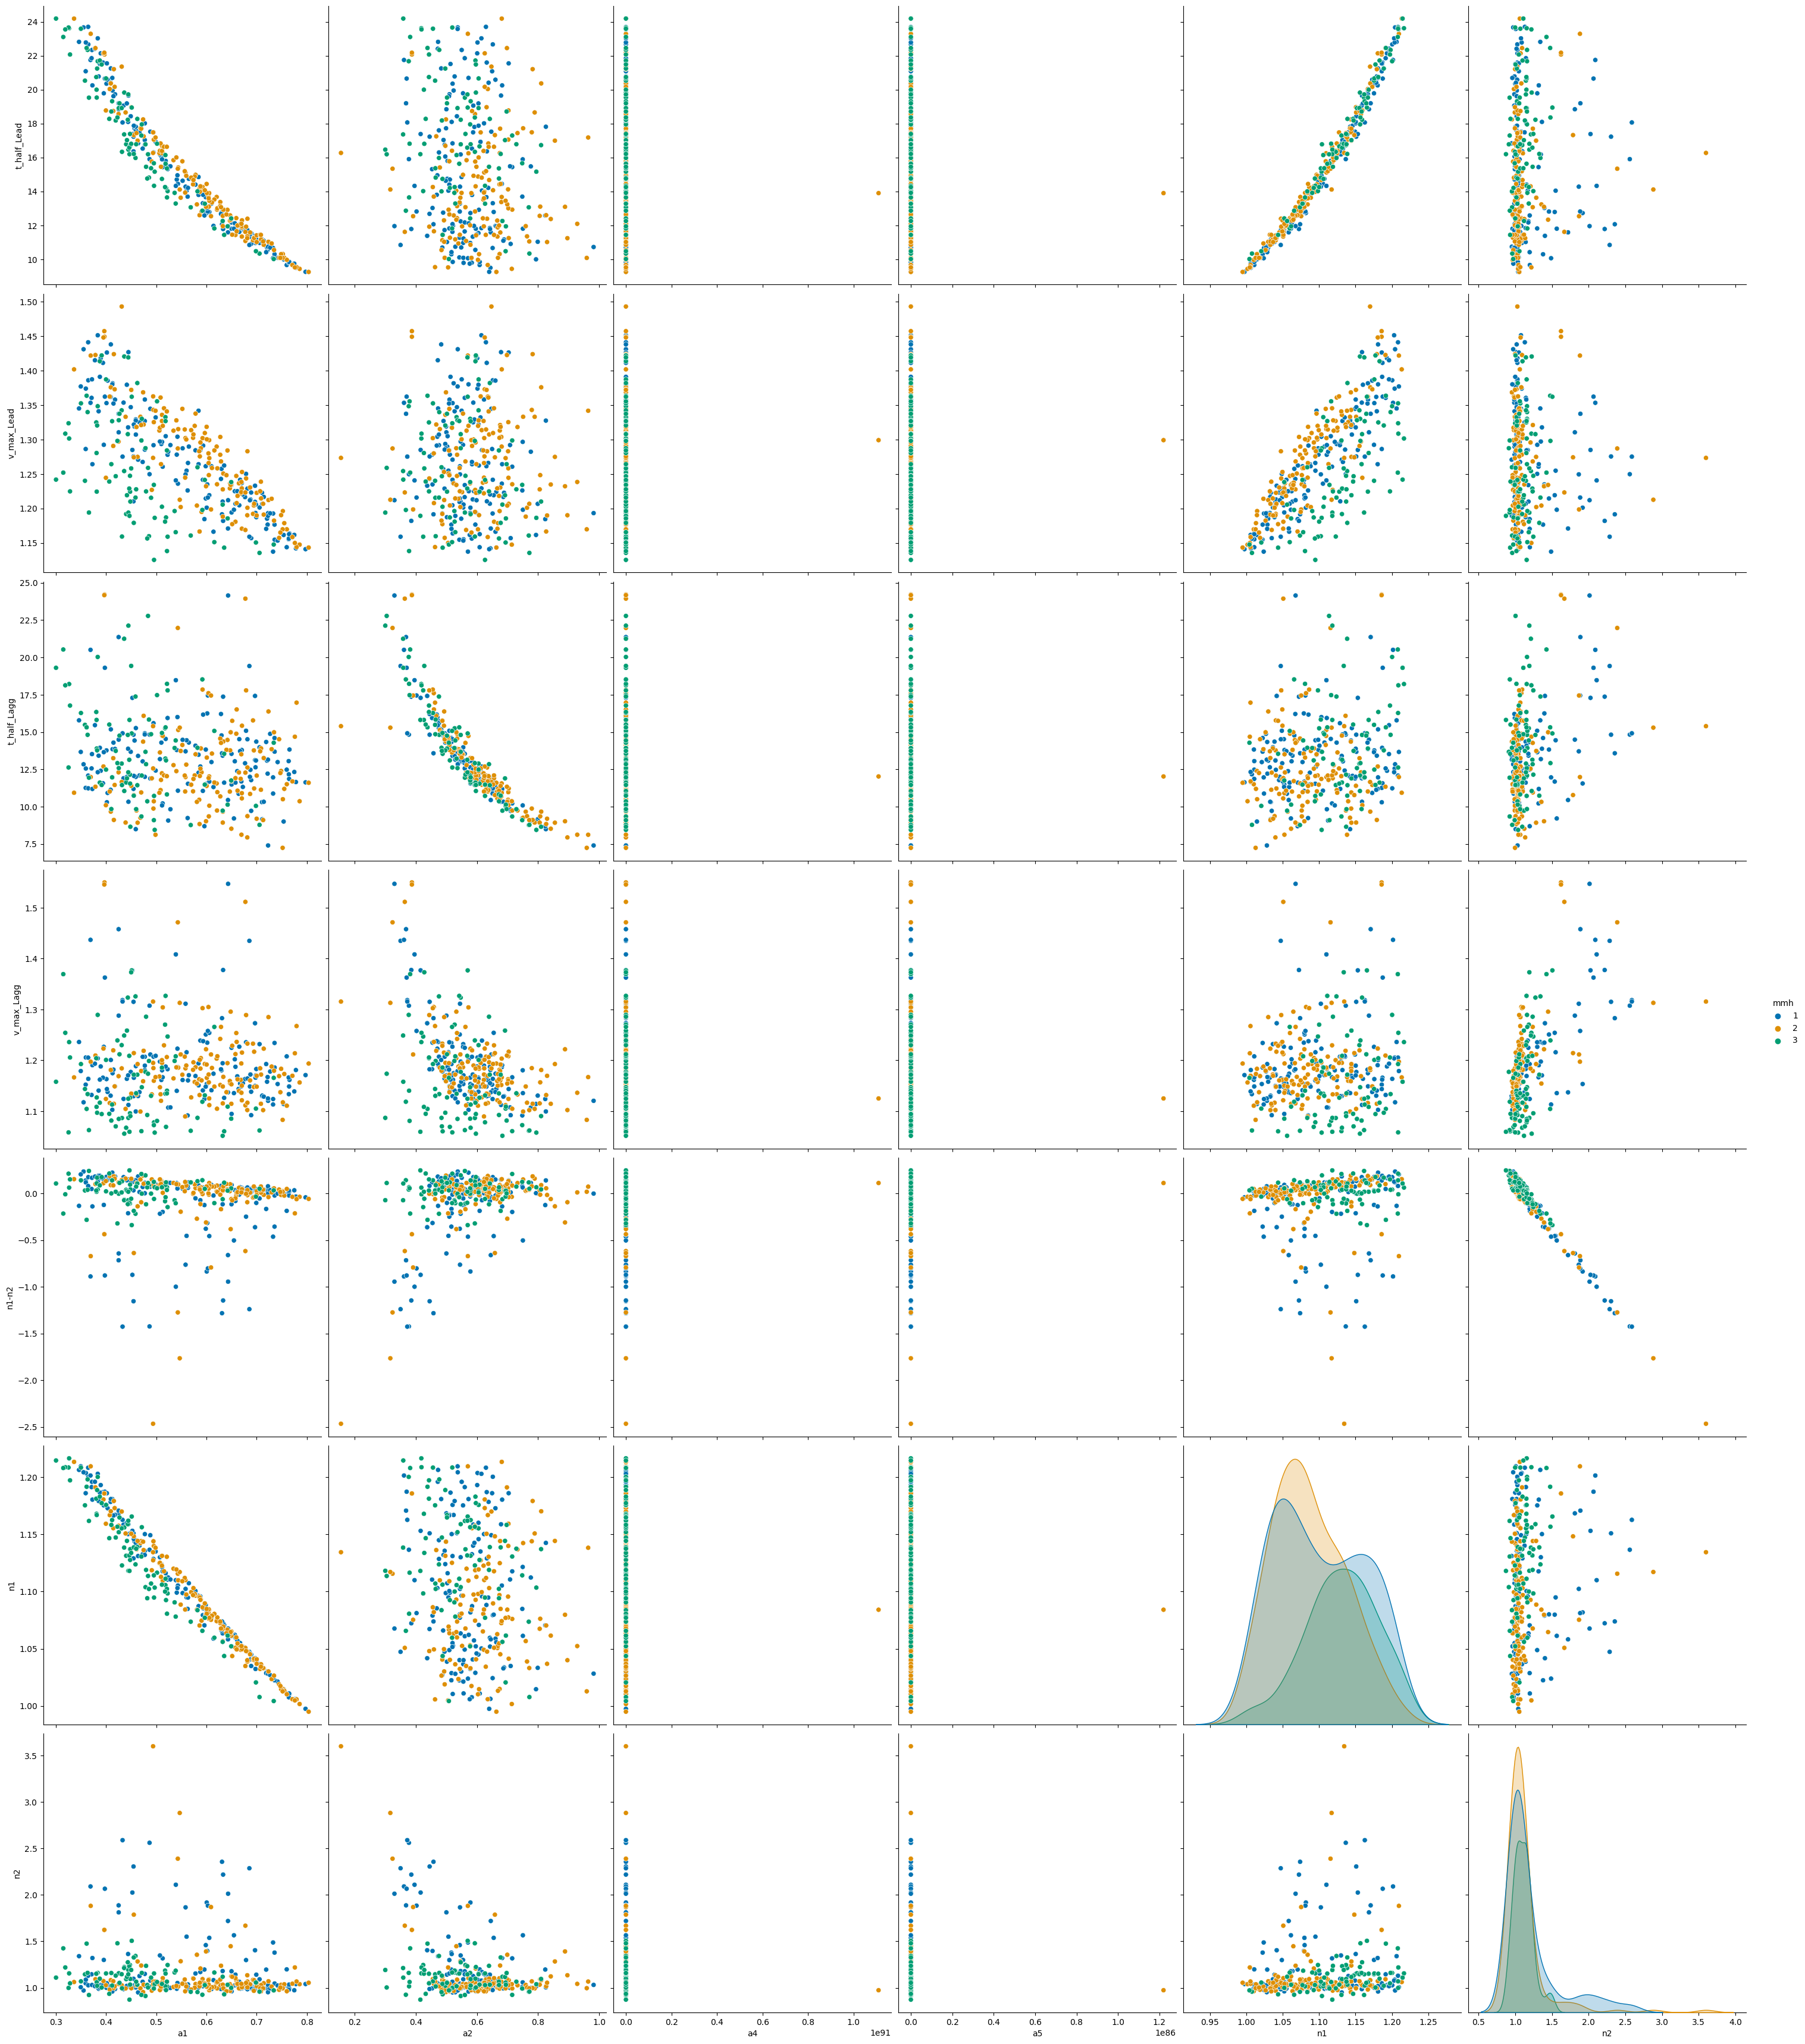

In [7]:
sns.pairplot(df, ## put the data frame here
                y_vars = ["t_half_Lead","v_max_Lead","t_half_Lagg","v_max_Lagg","n1-n2","n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh",palette="colorblind")

plt.show()

In [8]:
##count the number of each mmh1 type
df['mmh'].value_counts()

mmh
1    146
2    134
3     80
Name: count, dtype: int64

In [9]:
df['a4_log'] = df['a4'].apply(np.log10)
df['a5_log'] = df['a5'].apply(np.log10)

In [10]:
params_trimmed = df[df['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [11]:
params_trimmed.sample(5)

a1        a2         a3        a4        a5        a6        a7   
193  0.573475  0.673732   1.194045  4.246934  1.350176  0.002303  0.000034  \
33   0.539155  0.395802  23.439967  1.471697  0.138560  0.012542  0.012700   
335  0.448544  0.810133   1.418715  0.490921  1.066425  0.007723  0.007764   
349  0.431240  0.605340   1.246912  0.551470  0.860001  0.035950  0.039668   
225  0.599249  0.888512   4.318099  2.464106  0.293104  0.028550  0.032017   

           n1        n2  t_half_Lead  ...  v_max_Lagg  LeadRecruitError   
193  1.096953  1.103081    14.420718  ...    1.181475          0.106399  \
33   1.110003  2.109312    14.329671  ...    1.408307          0.060388   
335  1.137154  1.095583    16.730354  ...    1.090485          0.222393   
349  1.155343  1.146476    18.915200  ...    1.229951          0.084950   
225  1.079729  1.391760    13.095756  ...    1.221827          0.080472   

     LaggRecruitError  CytoError  LeadRecoveryError  LaggRecoveryError  mmh   
193          0.154638   0.249461           1.517579           1.062208    2  \
33           0.229216   0.240043           1.240007           1.485009    1   
335          0.240169   0.271174           1.803505           1.619229    3   
349          0.115428   0.244479           1.334479           0.929982    3   
225          0.086223   0.200031           1.459389           2.376348    2   

        n1-n2    a4_log    a5_log  
193 -0.006129  0.628076  0.130390  
33  -0.999309  0.167818 -0.858361  
335  0.041571 -0.308988  0.027930  
349  0.008867 -0.258478 -0.065501  
225 -0.312031  0.391659 -0.532979  

[5 rows x 22 columns]

In [12]:
params_trimmed['mmh'].value_counts()

mmh
3    80
1    60
2    39
Name: count, dtype: int64

In [13]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 359
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   a1                 179 non-null    float64
 1   a2                 179 non-null    float64
 2   a3                 179 non-null    float64
 3   a4                 179 non-null    float64
 4   a5                 179 non-null    float64
 5   a6                 179 non-null    float64
 6   a7                 179 non-null    float64
 7   n1                 179 non-null    float64
 8   n2                 179 non-null    float64
 9   t_half_Lead        179 non-null    float64
 10  v_max_Lead         179 non-null    float64
 11  t_half_Lagg        179 non-null    float64
 12  v_max_Lagg         179 non-null    float64
 13  LeadRecruitError   179 non-null    float64
 14  LaggRecruitError   179 non-null    float64
 15  CytoError          179 non-null    float64
 16  LeadRecoveryError  179 non-null

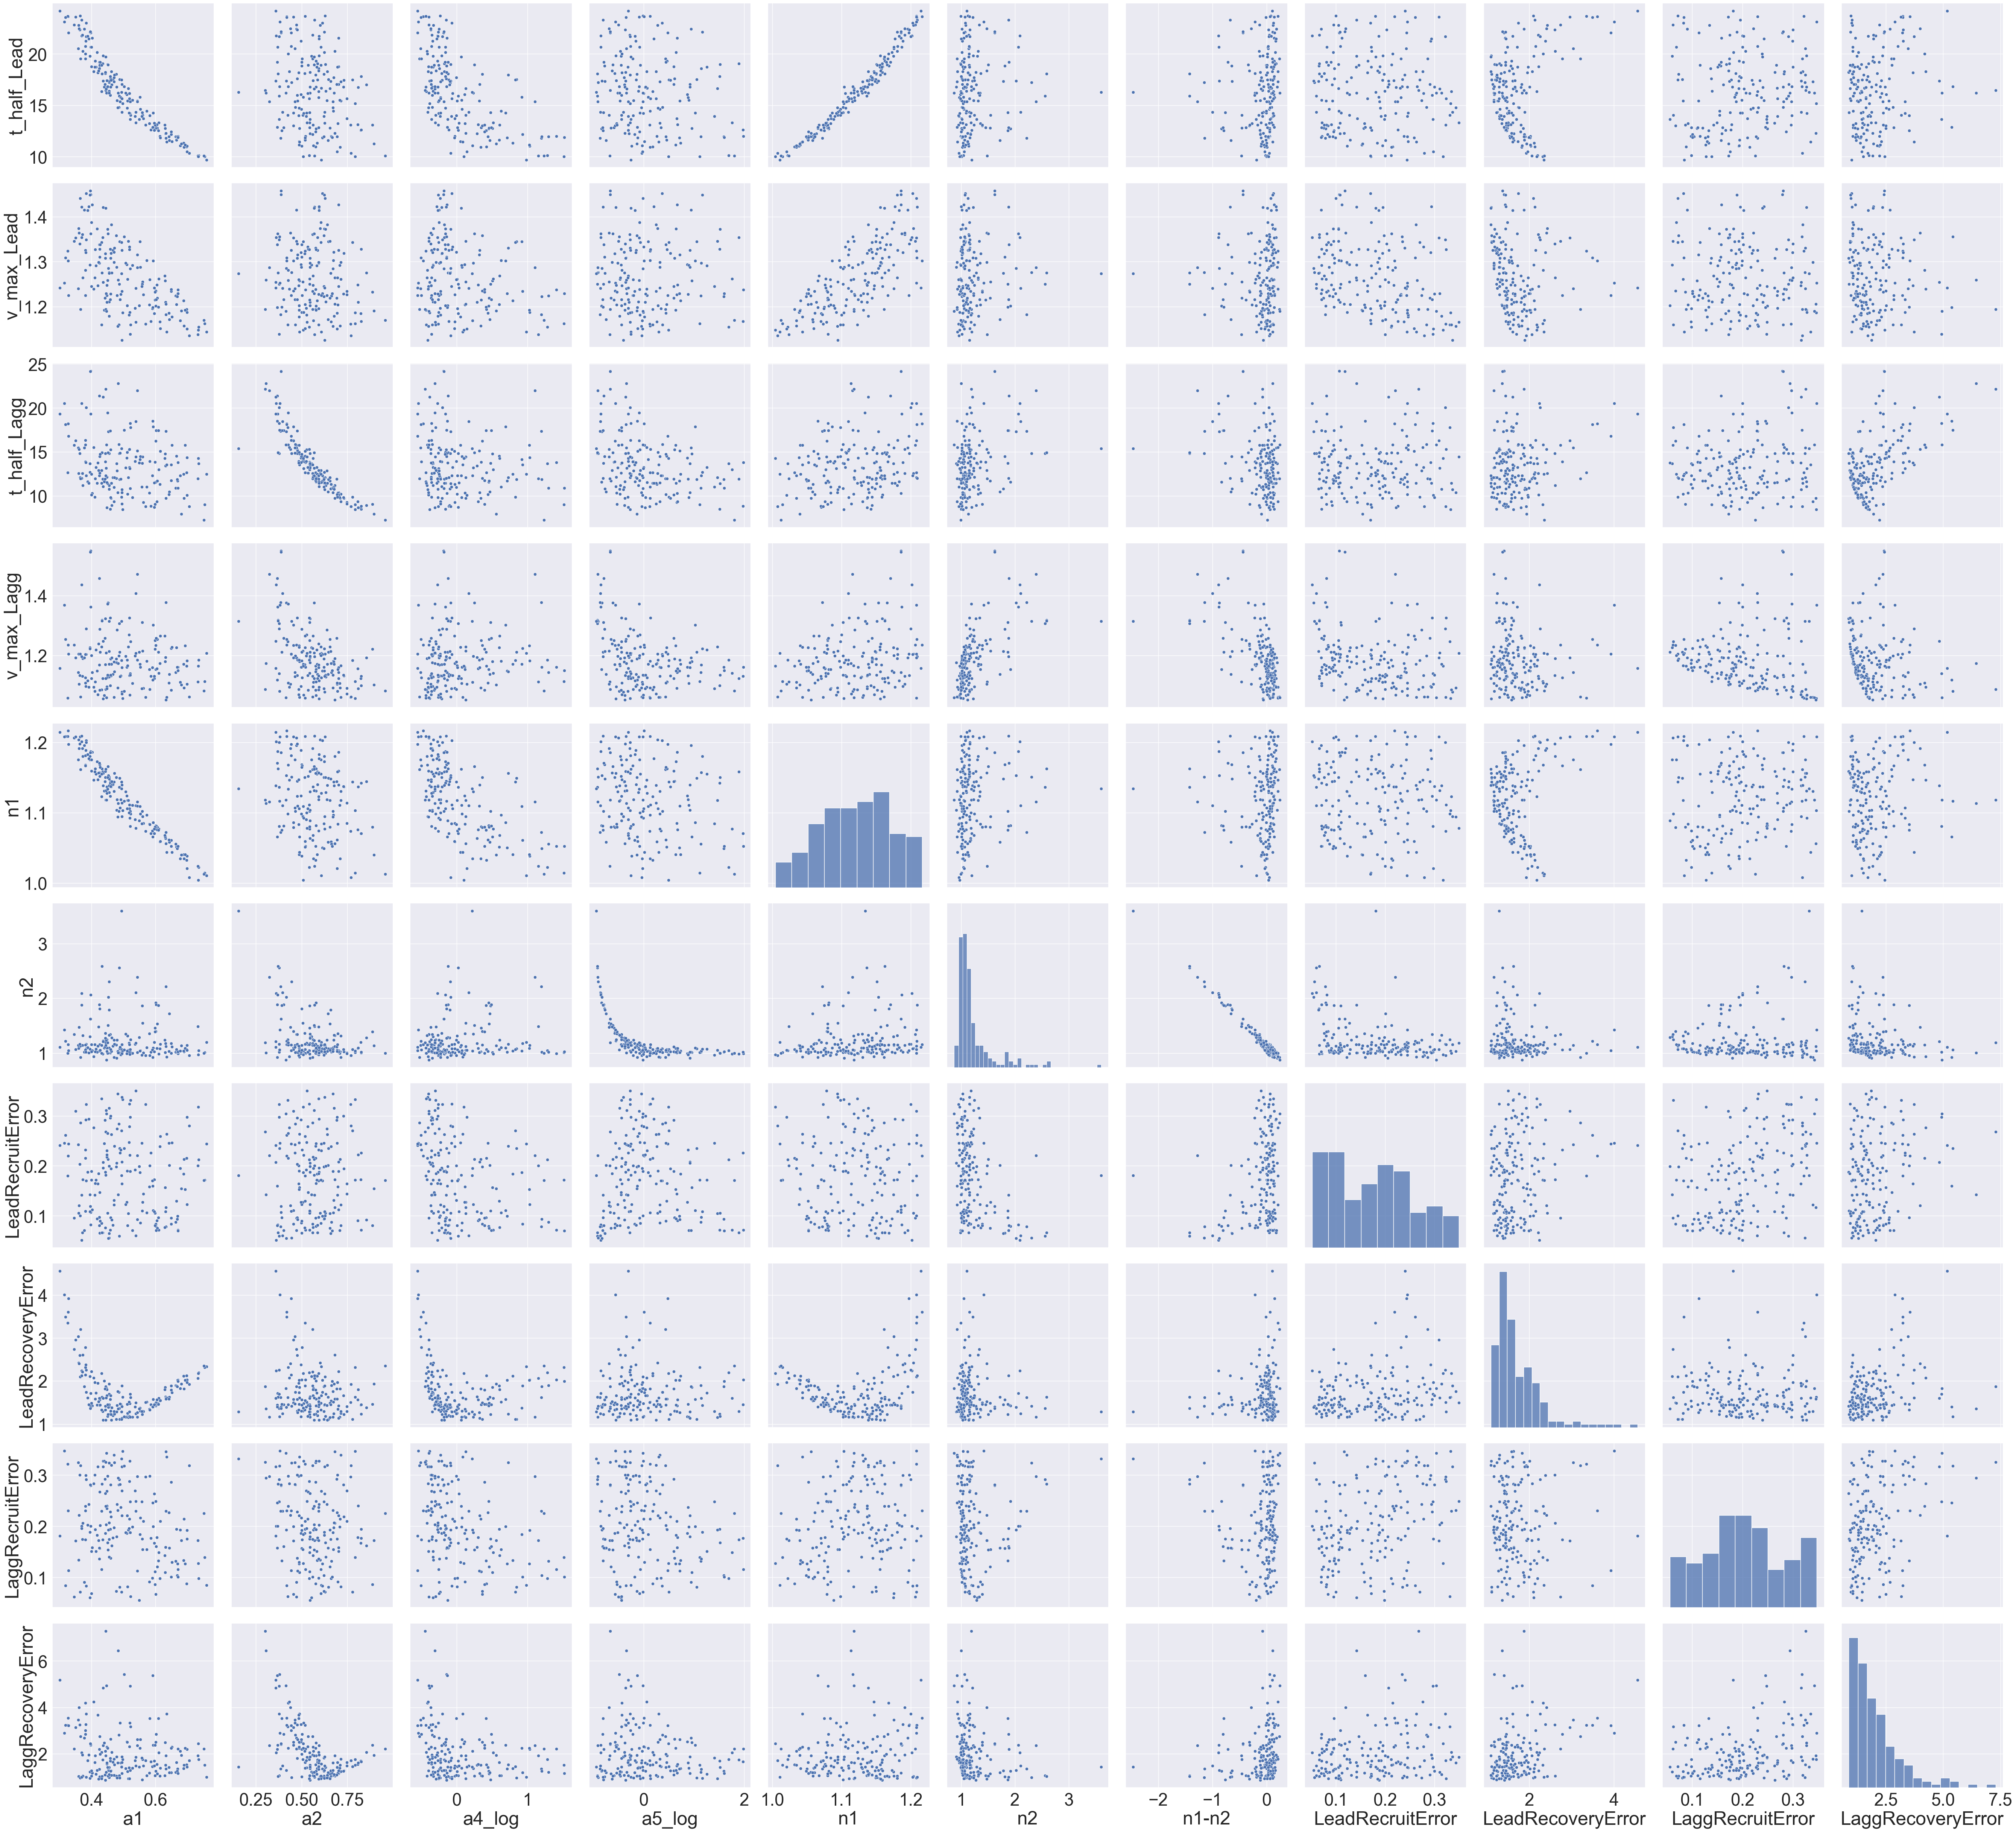

In [22]:
sns.pairplot(params_trimmed,
                y_vars = ["t_half_Lead","v_max_Lead","t_half_Lagg","v_max_Lagg","n1","n2","LeadRecruitError","LeadRecoveryError","LaggRecruitError","LaggRecoveryError"],
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2","n1-n2","LeadRecruitError","LeadRecoveryError","LaggRecruitError","LaggRecoveryError"],
                height = 5)
sns.set(font_scale=3)

plt.show()

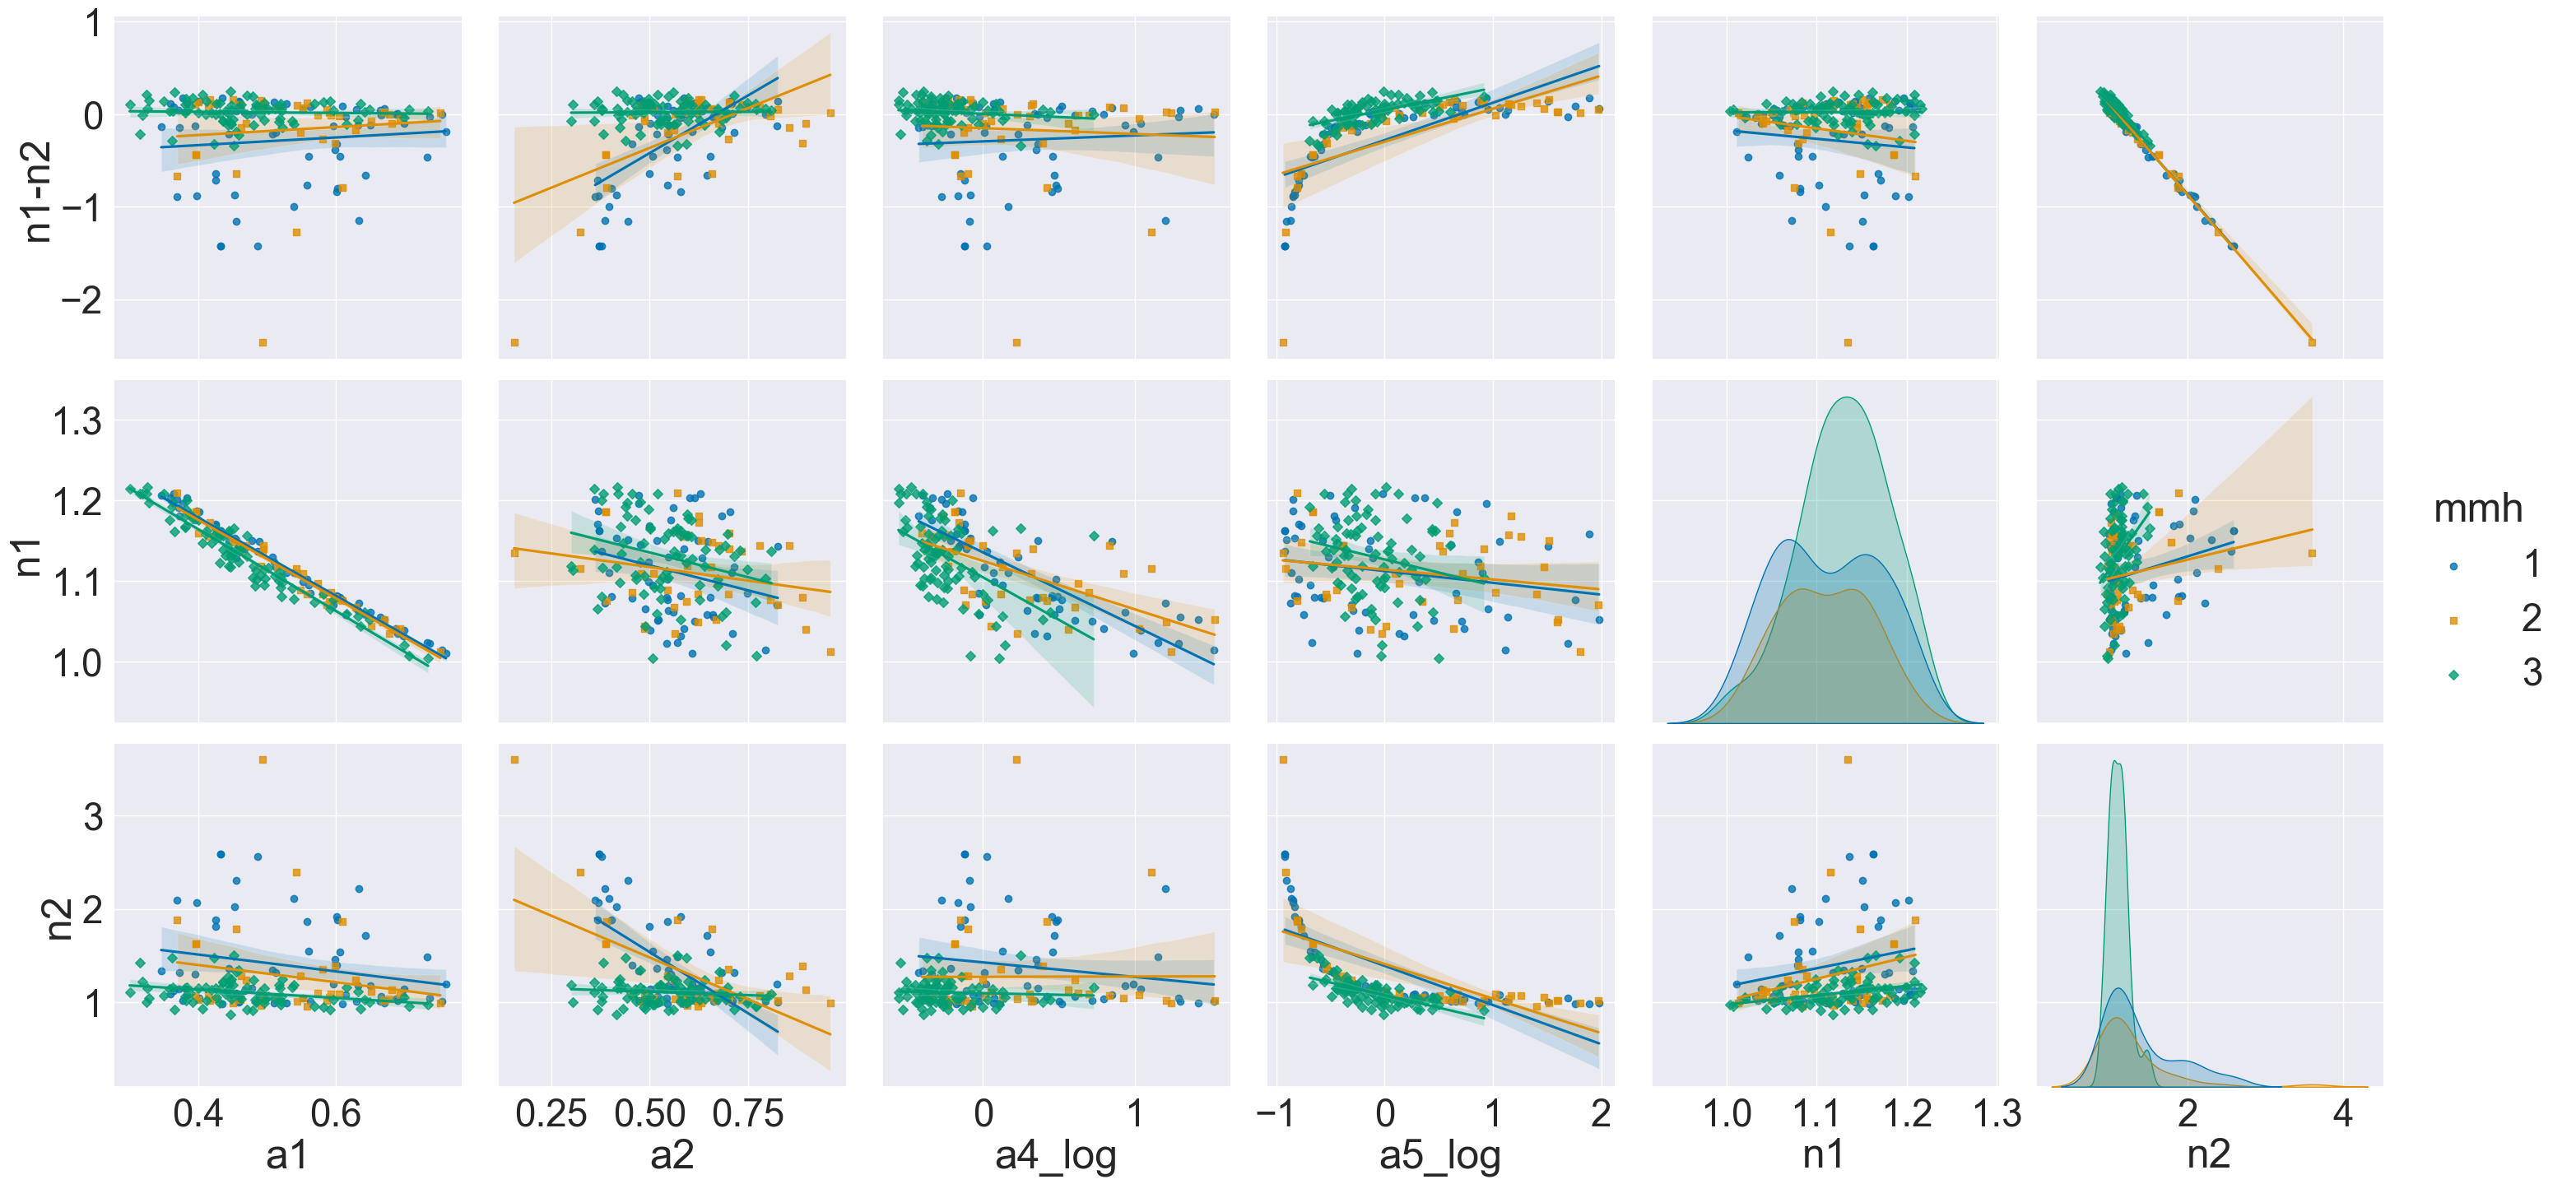

In [24]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["n1-n2","n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                kind="reg",                
                hue="mmh", palette="colorblind",
                markers=["o", "s", "D"])
sns.set(font_scale=2)
plt.show()